In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [76]:
data = pd.read_csv("3w.csv")

Features and Target variables

In [77]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# HV and LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W']].values

target = data['SD'].values

Normalize data

In [78]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [79]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [80]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [81]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/800
17/17 [==============================] - 2s 22ms/step - loss: 437.8073 - val_loss: 622.0895
Epoch 2/800
17/17 [==============================] - 0s 4ms/step - loss: 427.7524 - val_loss: 593.9367
Epoch 3/800
17/17 [==============================] - 0s 5ms/step - loss: 341.9578 - val_loss: 223.9024
Epoch 4/800
17/17 [==============================] - 0s 4ms/step - loss: 65.2335 - val_loss: 75.9699
Epoch 5/800
17/17 [==============================] - 0s 4ms/step - loss: 53.6831 - val_loss: 51.5540
Epoch 6/800
17/17 [==============================] - 0s 4ms/step - loss: 53.1064 - val_loss: 49.2126
Epoch 7/800
17/17 [==============================] - 0s 4ms/step - loss: 51.4545 - val_loss: 57.1885
Epoch 8/800
17/17 [==============================] - 0s 4ms/step - loss: 52.4531 - val_loss: 59.4826
Epoch 9/800
17/17 [==============================] - 0s 5ms/step - loss: 50.0700 - val_loss: 61.2809
Epoch 10/800
17/17 [==============================] - 0s 4ms/step - loss: 53.3992 - 

Visualize LSTM results

0.703413615753211


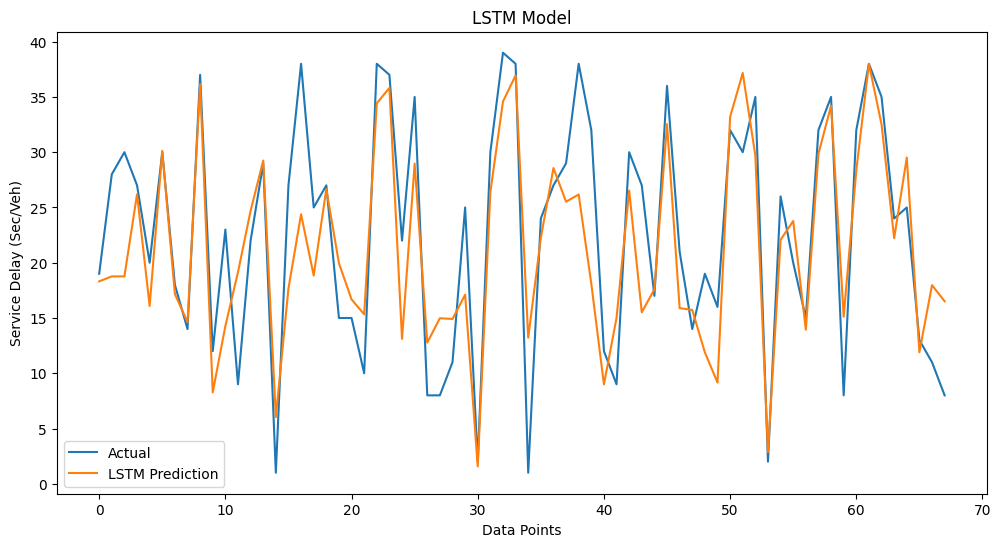

In [82]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [83]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/800
9/9 [==============================] - 7s 85ms/step - loss: 437.4698 - val_loss: 620.6187
Epoch 2/800
9/9 [==============================] - 0s 12ms/step - loss: 429.5821 - val_loss: 602.8115
Epoch 3/800
9/9 [==============================] - 0s 14ms/step - loss: 407.0663 - val_loss: 536.9327
Epoch 4/800
9/9 [==============================] - 0s 12ms/step - loss: 297.7314 - val_loss: 151.2401
Epoch 5/800
9/9 [==============================] - 0s 9ms/step - loss: 93.9599 - val_loss: 74.1337
Epoch 6/800
9/9 [==============================] - 0s 8ms/step - loss: 81.0320 - val_loss: 70.7256
Epoch 7/800
9/9 [==============================] - 0s 17ms/step - loss: 61.6981 - val_loss: 46.0763
Epoch 8/800
9/9 [==============================] - 0s 10ms/step - loss: 46.0311 - val_loss: 53.3083
Epoch 9/800
9/9 [==============================] - 0s 9ms/step - loss: 45.1012 - val_loss: 41.4203
Epoch 10/800
9/9 [==============================] - 0s 9ms/step - loss: 39.8384 - val_loss: 43.

Visualize BiLSTM results

0.7113544879922398


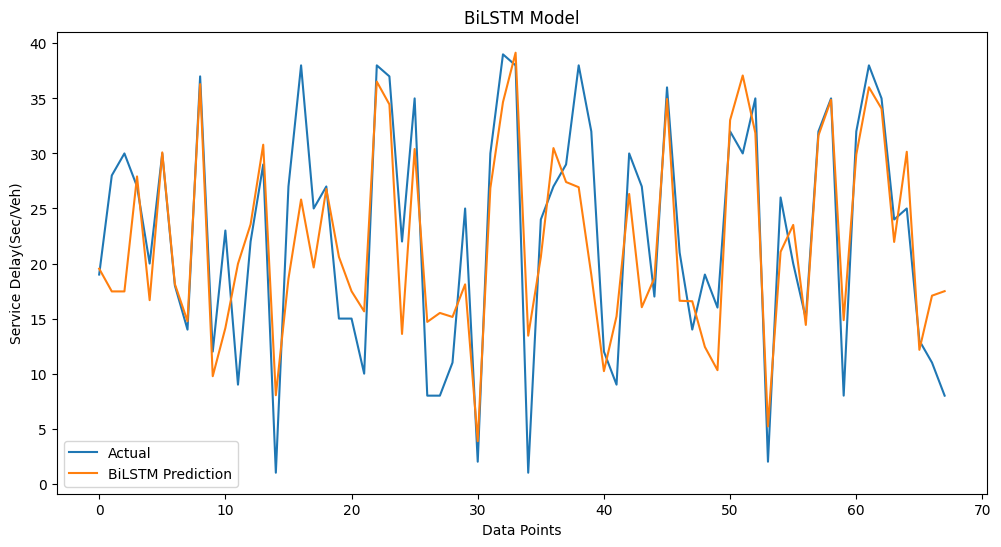

In [84]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [85]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/800
17/17 [==============================] - 1s 16ms/step - loss: 435.0281 - val_loss: 610.8553
Epoch 2/800
17/17 [==============================] - 0s 4ms/step - loss: 402.3232 - val_loss: 517.1779
Epoch 3/800
17/17 [==============================] - 0s 4ms/step - loss: 206.6886 - val_loss: 67.1232
Epoch 4/800
17/17 [==============================] - 0s 4ms/step - loss: 70.6585 - val_loss: 80.9176
Epoch 5/800
17/17 [==============================] - 0s 3ms/step - loss: 54.9133 - val_loss: 71.1058
Epoch 6/800
17/17 [==============================] - 0s 4ms/step - loss: 50.1467 - val_loss: 54.2159
Epoch 7/800
17/17 [==============================] - 0s 3ms/step - loss: 49.3433 - val_loss: 55.9907
Epoch 8/800
17/17 [==============================] - 0s 4ms/step - loss: 49.0267 - val_loss: 55.6630
Epoch 9/800
17/17 [==============================] - 0s 3ms/step - loss: 48.5125 - val_loss: 50.0645
Epoch 10/800
17/17 [==============================] - 0s 4ms/step - loss: 48.4289 - v

Visualize GRU results

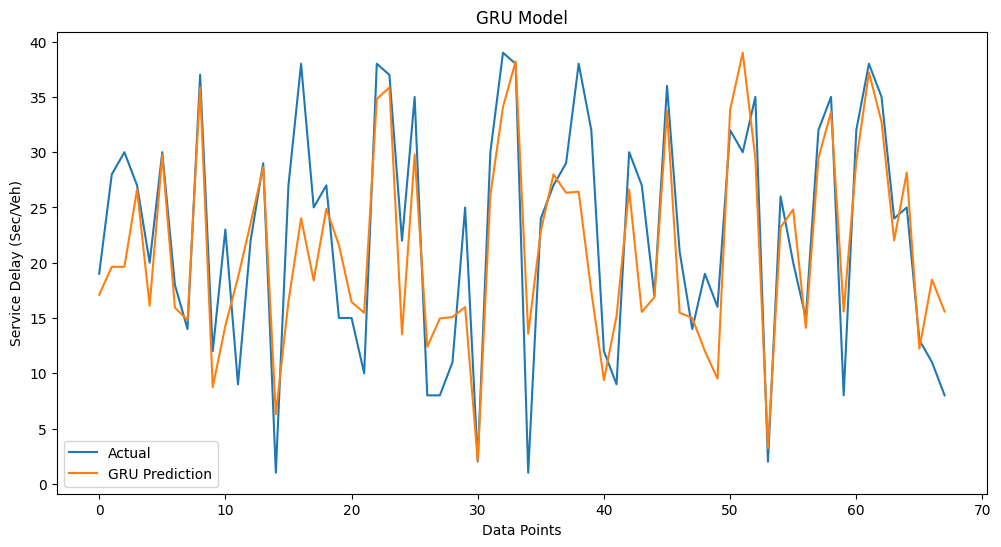

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [87]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=62, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/800
5/5 [==============================] - 3s 97ms/step - loss: 437.5697 - val_loss: 620.2236
Epoch 2/800
5/5 [==============================] - 0s 11ms/step - loss: 431.5759 - val_loss: 610.0414
Epoch 3/800
5/5 [==============================] - 0s 10ms/step - loss: 422.5085 - val_loss: 593.9056
Epoch 4/800
5/5 [==============================] - 0s 7ms/step - loss: 407.3107 - val_loss: 566.0245
Epoch 5/800
5/5 [==============================] - 0s 8ms/step - loss: 380.2643 - val_loss: 513.8817
Epoch 6/800
5/5 [==============================] - 0s 8ms/step - loss: 331.5508 - val_loss: 407.5752
Epoch 7/800
5/5 [==============================] - 0s 12ms/step - loss: 229.5895 - val_loss: 185.4076
Epoch 8/800
5/5 [==============================] - 0s 12ms/step - loss: 72.9348 - val_loss: 80.4919
Epoch 9/800
5/5 [==============================] - 0s 12ms/step - loss: 86.5975 - val_loss: 42.7215
Epoch 10/800
5/5 [==============================] - 0s 9ms/step - loss: 42.7651 - val_los

Visualize BiGRU results

0.6998682421648266


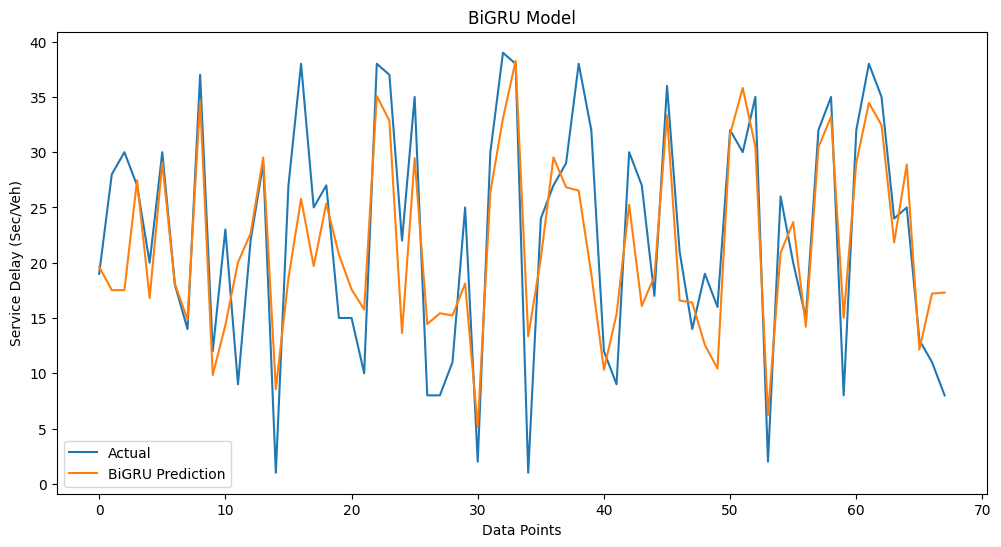

In [88]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [89]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/800
17/17 [==============================] - 0s 8ms/step - loss: 428.2194 - val_loss: 593.0585
Epoch 2/800
17/17 [==============================] - 0s 3ms/step - loss: 392.8179 - val_loss: 520.2806
Epoch 3/800
17/17 [==============================] - 0s 3ms/step - loss: 315.6496 - val_loss: 379.9208
Epoch 4/800
17/17 [==============================] - 0s 3ms/step - loss: 195.2840 - val_loss: 193.8663
Epoch 5/800
17/17 [==============================] - 0s 2ms/step - loss: 81.0852 - val_loss: 66.8176
Epoch 6/800
17/17 [==============================] - 0s 2ms/step - loss: 44.1639 - val_loss: 43.6230
Epoch 7/800
17/17 [==============================] - 0s 3ms/step - loss: 41.1222 - val_loss: 45.4624
Epoch 8/800
17/17 [==============================] - 0s 3ms/step - loss: 39.7200 - val_loss: 46.6299
Epoch 9/800
17/17 [==============================] - 0s 3ms/step - loss: 39.6263 - val_loss: 45.8421
Epoch 10/800
17/17 [==============================] - 0s 3ms/step - loss: 39.1115 -

Visualize CNN results

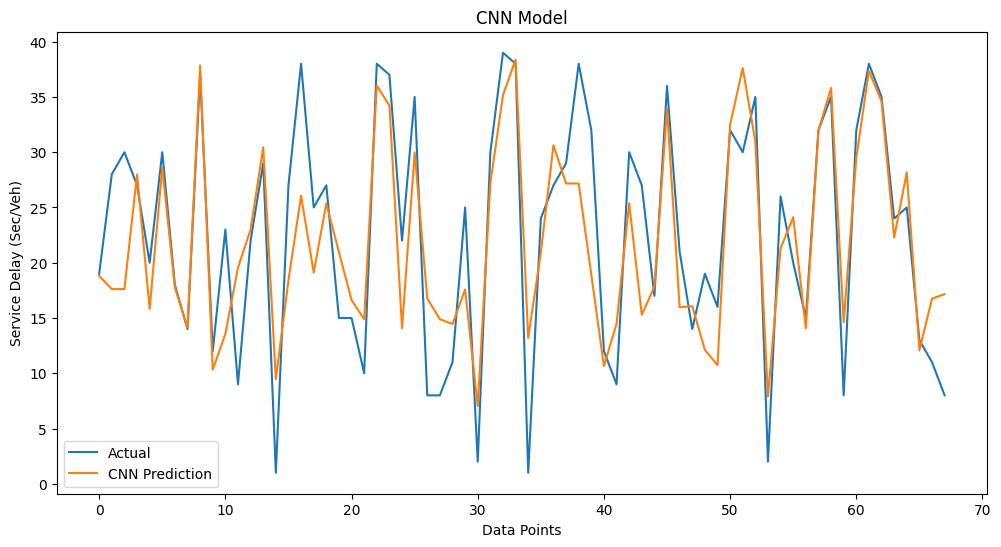

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [91]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
17/17 [==============================] - 1s 13ms/step - loss: 436.5933 - val_loss: 617.3149
Epoch 2/800
17/17 [==============================] - 0s 3ms/step - loss: 421.7381 - val_loss: 576.2189
Epoch 3/800
17/17 [==============================] - 0s 3ms/step - loss: 342.3315 - val_loss: 310.3589
Epoch 4/800
17/17 [==============================] - 0s 3ms/step - loss: 107.2963 - val_loss: 48.7444
Epoch 5/800
17/17 [==============================] - 0s 3ms/step - loss: 51.0638 - val_loss: 55.8567
Epoch 6/800
17/17 [==============================] - 0s 4ms/step - loss: 45.2295 - val_loss: 41.1558
Epoch 7/800
17/17 [==============================] - 0s 3ms/step - loss: 44.7444 - val_loss: 48.2984
Epoch 8/800
17/17 [==============================] - 0s 3ms/step - loss: 43.2855 - val_loss: 40.5929
Epoch 9/800
17/17 [==============================] - 0s 3ms/step - loss: 43.6189 - val_loss: 43.4645
Epoch 10/800
17/17 [==============================] - 0s 3ms/step - loss: 42.8560 -

Visualize CNN_LSTM results

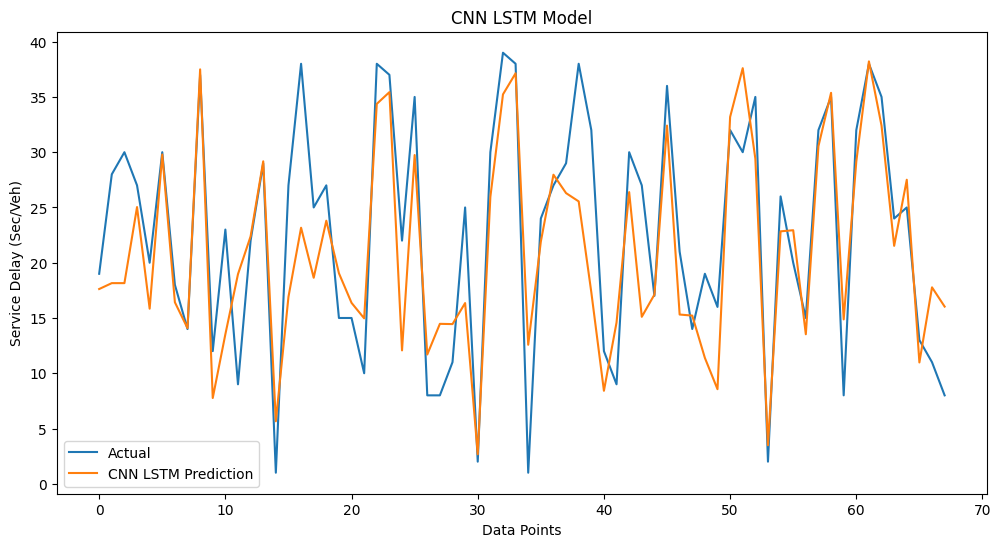

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [93]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/800
9/9 [==============================] - 2s 43ms/step - loss: 438.0378 - val_loss: 621.5015
Epoch 2/800
9/9 [==============================] - 0s 8ms/step - loss: 432.0353 - val_loss: 610.3354
Epoch 3/800
9/9 [==============================] - 0s 16ms/step - loss: 420.2845 - val_loss: 585.3710
Epoch 4/800
9/9 [==============================] - 0s 6ms/step - loss: 394.2176 - val_loss: 519.9813
Epoch 5/800
9/9 [==============================] - 0s 6ms/step - loss: 322.0008 - val_loss: 331.3309
Epoch 6/800
9/9 [==============================] - 0s 8ms/step - loss: 140.1450 - val_loss: 51.0927
Epoch 7/800
9/9 [==============================] - 0s 7ms/step - loss: 77.1355 - val_loss: 65.3759
Epoch 8/800
9/9 [==============================] - 0s 6ms/step - loss: 48.5320 - val_loss: 61.8868
Epoch 9/800
9/9 [==============================] - 0s 6ms/step - loss: 50.3848 - val_loss: 45.3261
Epoch 10/800
9/9 [==============================] - 0s 6ms/step - loss: 41.4787 - val_loss: 43.1

Visualize CNN_BiLSTM results

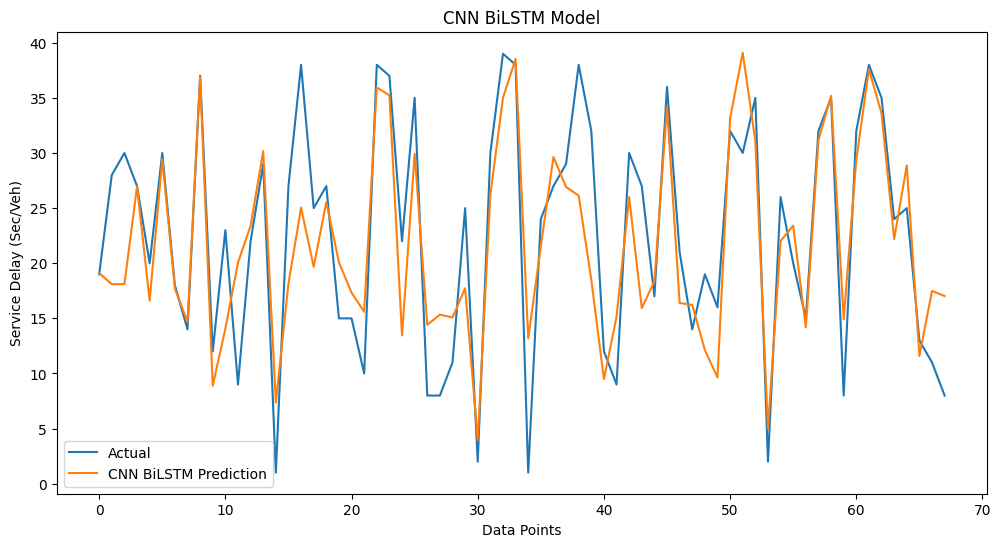

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [95]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

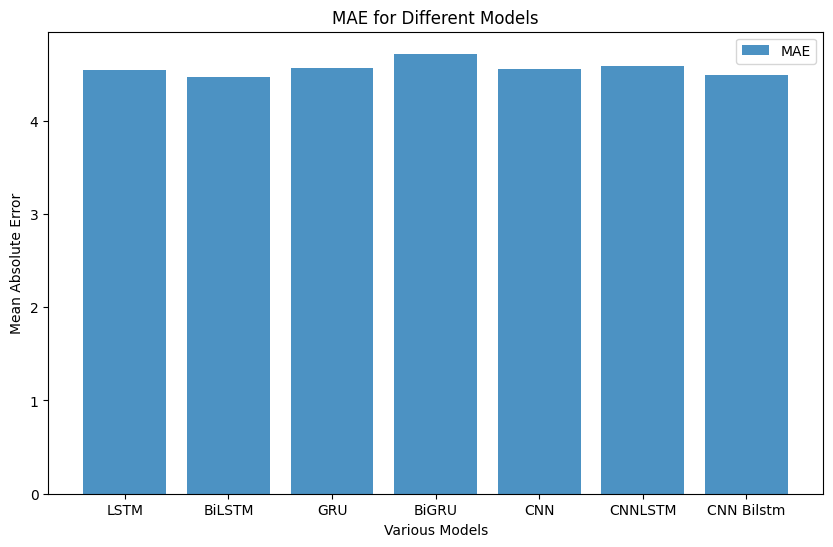

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

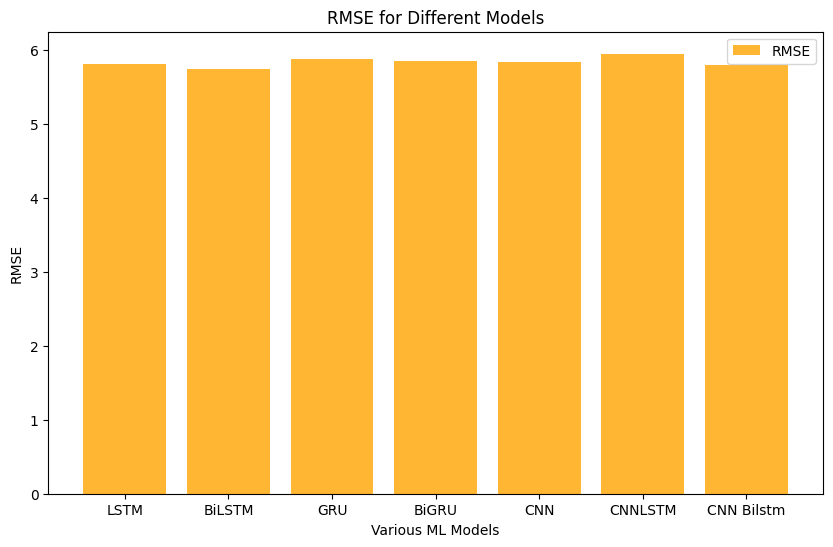

In [97]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

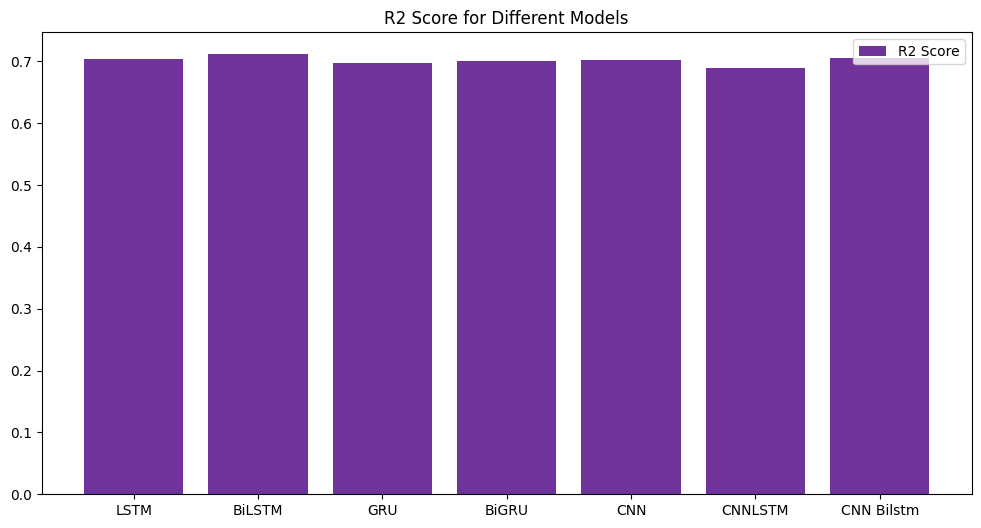

In [98]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [99]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 4.543090473203098
LSTM MSE: 5.8105384836248435
LSTM R2 Score: 0.703413615753211

BiLSTM MAE: 4.465963212882771
BiLSTM MSE: 5.732224378531558
BiLSTM R2 Score: 0.7113544879922398

GRU MAE: 4.562170098809635
GRU MSE: 5.869709652972866
GRU R2 Score: 0.6973423301022494

BiGRU MAE: 4.719695063198314
BiGRU MSE: 5.8451647032894645
BiGRU R2 Score: 0.6998682421648266

CNN MAE: 4.553642897044911
CNN MSE: 5.828653768072412
CNN R2 Score: 0.7015614218719342

CNN LSTM MAE: 4.583764910697937
CNN LSTM MSE: 5.945362115113877
CNN LSTM R2 Score: 0.6894903737536757

CNN BiLSTM MAE: 4.492440995048074
CNN BiLSTM MSE: 5.790487256442481
CNN BiLSTM R2 Score: 0.7054570270673025


Plot predictions for each model

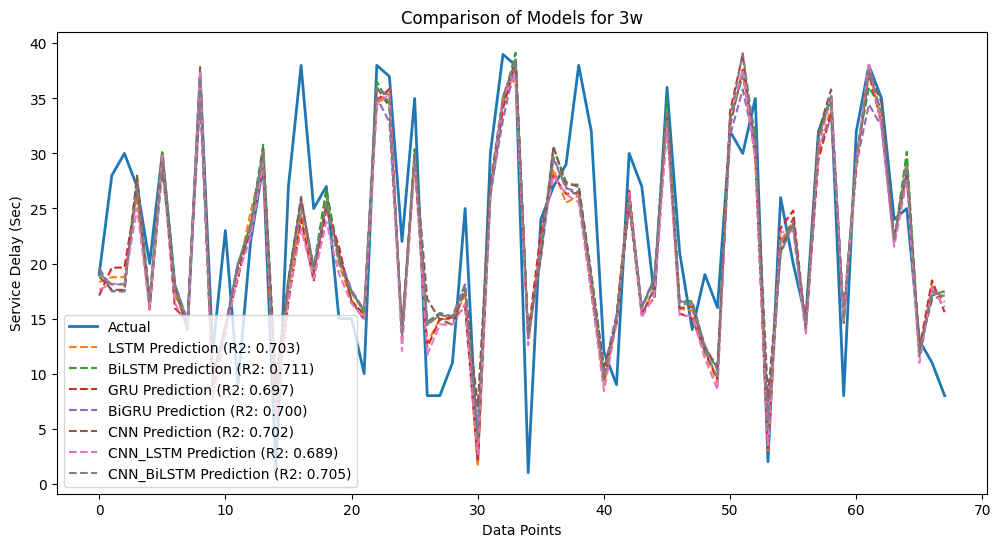

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for 3w')
plt.show()

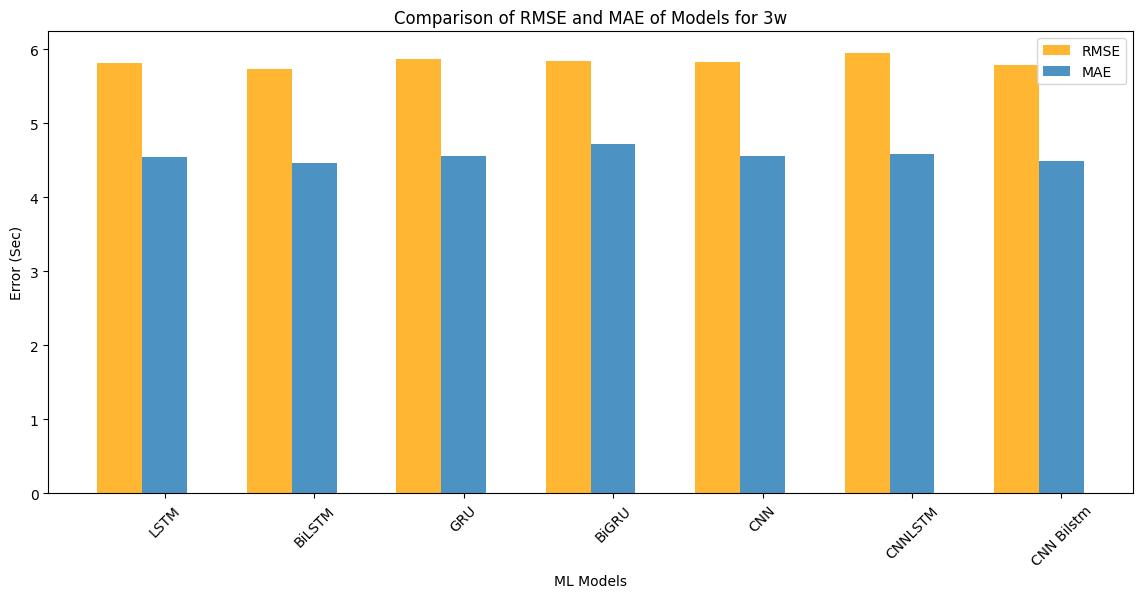

In [101]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for 3w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()